In [2]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
conn = sqlite3.connect ("Sales_2025.db")
cursor = conn.cursor()

In [4]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales_datasets(
    ID INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

data = [
    ("laptop", 12, 12500),
    ("earpod", 50, 4500),
    ("phone", 20, 25000),
    ("earpod", 5, 6000),
    ("radio", 32, 1025),
    ("laptop", 3, 60000),
    ("headphones", 62, 3500)
]

cursor.executemany("""
INSERT INTO sales_datasets(product, quantity, price) VALUES (?, ?, ?)
""", data)

conn.commit()


In [5]:
print(data)

[('laptop', 12, 12500), ('earpod', 50, 4500), ('phone', 20, 25000), ('earpod', 5, 6000), ('radio', 32, 1025), ('laptop', 3, 60000), ('headphones', 62, 3500)]


In [6]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales_datasets
GROUP BY product
"""
df = pd.read_sql_query(query, conn)


In [7]:
print("Sales Summary")
print(df)

Sales Summary
      product  total_qty    revenue
0      earpod        220  1020000.0
1  headphones        248   868000.0
2      laptop         60  1320000.0
3       phone         80  2000000.0
4       radio        128   131200.0


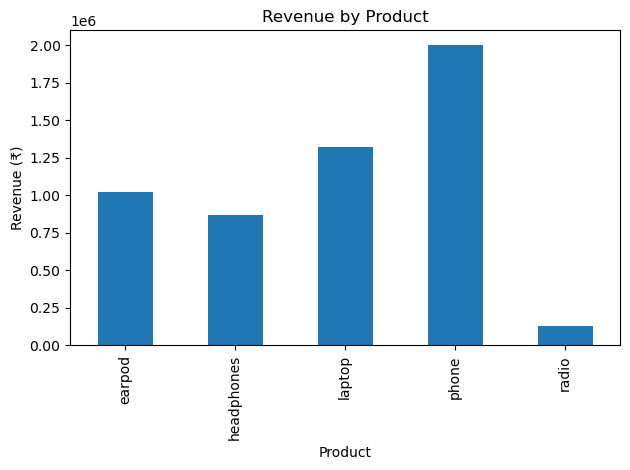

In [16]:
df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.jpg")
plt.show()

In [24]:
conn.close

<function Connection.close()>